<a href="https://colab.research.google.com/github/bigdatadatafan/projects/blob/main/Regresi%C3%B3n_polinomica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# --- 1. GENERAR DATOS NO LINEALES (Una curva) ---
np.random.seed(42)
m = 20
X = 6 * np.random.rand(m, 1) - 3   # Valores entre -3 y 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # Una parábola con ruido

# Para graficar suavemente luego
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)

# --- 2. PREPARACIÓN DE DATOS (Ingeniería de Características) ---

# A. Crear Polinomios (Elevar X a potencias)
# Vamos a exagerar con grado 10 para forzar el Overfitting
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)
X_plot_poly = poly.transform(X_plot)

# B. Escalado (StandardScaler) - ¡CRUCIAL!
# Sin esto, x^10 sería millones de veces más grande que x, y el modelo falla.
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
X_plot_poly_scaled = scaler.transform(X_plot_poly)

print("Ejemplo de transformación:")
print(f"Dato original: {X[0]}")
print(f"Polinomio (x, x^2...): {X_poly[0][:3]}... (valores dispares)")
print(f"Escalado: {X_poly_scaled[0][:3]}... (todo centrado en 0)")




Ejemplo de transformación:
Dato original: [-0.75275929]
Polinomio (x, x^2...): [-0.75275929  0.56664654 -0.42654845]... (valores dispares)
Escalado: [-0.27730331 -1.04050478  0.04100224]... (todo centrado en 0)


In [2]:
# --- 3. ENTRENAMIENTO DE MODELOS ---

# Modelo 1: Regresión Lineal Polinómica SIN FRENOS (Overfitting)
modelo_loco = LinearRegression()
modelo_loco.fit(X_poly_scaled, y)

# Modelo 2: Regresión Polinómica CON RIDGE (Regularizado)
# alpha=1 regula los coeficientes para evitar curvas extremas
modelo_ridge = Ridge(alpha=1.0)
modelo_ridge.fit(X_poly_scaled, y)

# --- 4. CÁLCULO DE ERRORES (MSE y RMSE) ---
y_pred_loco = modelo_loco.predict(X_poly_scaled)
rmse_loco = np.sqrt(mean_squared_error(y, y_pred_loco))

y_pred_ridge = modelo_ridge.predict(X_poly_scaled)
rmse_ridge = np.sqrt(mean_squared_error(y, y_pred_ridge))

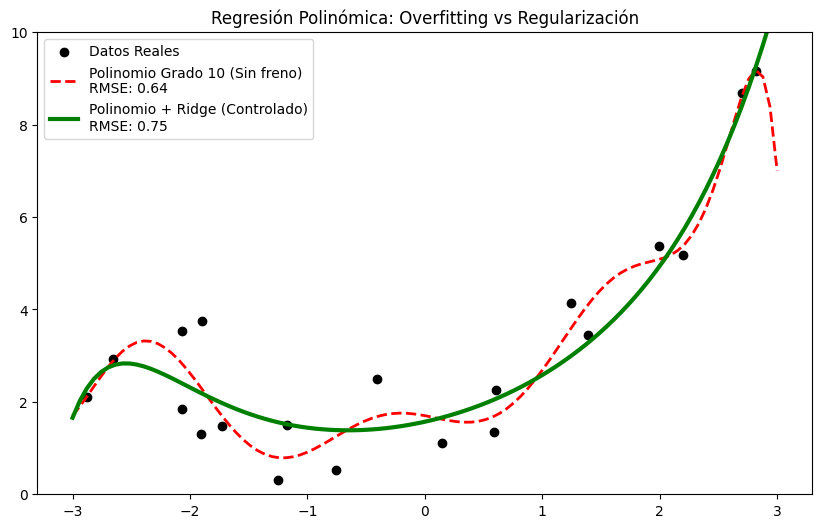

Suma de coeficientes (Modelo Loco): 372.40
Suma de coeficientes (Modelo Ridge): 3.82


In [3]:
# --- 5. VISUALIZACIÓN ---
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Datos Reales')

# Dibujar modelo loco
y_plot_loco = modelo_loco.predict(X_plot_poly_scaled)
plt.plot(X_plot, y_plot_loco, 'r--', linewidth=2, label=f'Polinomio Grado 10 (Sin freno)\nRMSE: {rmse_loco:.2f}')

# Dibujar modelo Ridge
y_plot_ridge = modelo_ridge.predict(X_plot_poly_scaled)
plt.plot(X_plot, y_plot_ridge, 'g-', linewidth=3, label=f'Polinomio + Ridge (Controlado)\nRMSE: {rmse_ridge:.2f}')

plt.title("Regresión Polinómica: Overfitting vs Regularización")
plt.legend()
plt.ylim(0, 10) # Limitamos eje Y para que no se vea el infinito del modelo loco
plt.show()

print(f"Suma de coeficientes (Modelo Loco): {np.sum(np.abs(modelo_loco.coef_)):.2f}")
print(f"Suma de coeficientes (Modelo Ridge): {np.sum(np.abs(modelo_ridge.coef_)):.2f}")